<a href="https://colab.research.google.com/github/kayatoasty/ticket-analysis/blob/main/Ticket_Analysis_Revamped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!pip install df2img
import df2img
import numpy as np
# import matplotlib.ticker as ticker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 814.2/814.2 kB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully uninstalled traitlets-5.7.1
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.23.0 which is incompatible.


In [3]:
# df = pd.read_csv("/content/drive/MyDrive/Work/July_to_August_2022_incidents.csv", encoding="ISO-8859-1")
# /content/drive/MyDrive/April-June 2023.csv
# df = pd.read_csv("/content/drive/MyDrive/April-June 2023.csv", encoding="ISO-8859-1")
df = pd.read_csv("/content/drive/MyDrive/Oct-Dec 2023.csv", encoding="ISO-8859-1")
print(df.shape)
df.head(2)

def add_apps_column(df):
  if (df['u_business_service'] == 'Research Administration & Compliance Systems > Research Administration and Management > Research Administration & Compliance Reporting'):
                        return "RACR"
  elif (df['u_business_service'] == 'Research Administration & Compliance Systems > Research Administration and Management > Grants Management (GMAS)'):
                        return "GMAS"
  elif (df['u_business_service'] == 'Research Administration & Compliance Systems > Research Compliance > IRB (ESTR)'):
                        return "H-Apps"
  elif (df['u_business_service'] == 'Research Administration & Compliance Systems > Research Compliance > Agreements'):
                        return "H-Apps"
  elif (df['u_business_service'] == 'Research Administration & Compliance Systems > Research Compliance > Outside Activity and Interest Reporting (OAIR)'):
                        return "H-Apps"
  elif (df['u_business_service'] == 'Research Administration & Compliance Systems > Research Compliance > Data Safety'):
                        return "H-Apps"
  elif (df['u_business_service'] == 'Research Administration & Compliance Systems > Research Administration and Management > Effort Reporting (ECRT)'):
                        return "ECRT"
  elif (df['u_business_service'] == 'Research Administration & Compliance Systems > Research Administration and Management > PI Dashboard'):
                        return "PI-Dashboard"
  elif (df['u_business_service'] == 'Research Administration & Compliance Systems > Research Administration and Management > Research Administration Portal'):
                        return "Admin Portal"
  else:
                        return df['u_business_service']

# print(df.assignment_group.unique())
# print(df.u_business_service.unique())

df['Service_Group'] = df.apply(add_apps_column, axis = 1)
# print(df.u_business_service.unique(), "\n")
print(df.Service_Group.unique(), "\n", "\n")

service_group_unique = df.Service_Group.unique()

print( f"service_group_unique type --> {type(service_group_unique)}" )

for index in service_group_unique:
  print( f"index ==> {index}" )

# for service_group in df['Service_Group']:
#   print( f"service_group ==> {service_group}" )

# adding a column for month
df['month'] = pd.DatetimeIndex(df['sys_created_on']).month

# filling issue codes with Request if they are NA values
df['u_issue_code'] = df['u_issue_code'].fillna("Request")
# print(df.columns)

(743, 21)
['GMAS' 'ECRT' 'RACR' 'H-Apps' 'PI-Dashboard' 'IT Tools > Scheduling'
 'Network Services > VPN'
 'Enterprise Data Analysis and Reporting > Business Intelligence application services'] 
 

service_group_unique type --> <class 'numpy.ndarray'>
index ==> GMAS
index ==> ECRT
index ==> RACR
index ==> H-Apps
index ==> PI-Dashboard
index ==> IT Tools > Scheduling
index ==> Network Services > VPN
index ==> Enterprise Data Analysis and Reporting > Business Intelligence application services


In [4]:
df.Service_Group.value_counts()

Service_Group
H-Apps                                                                                 272
GMAS                                                                                   233
ECRT                                                                                   157
RACR                                                                                    55
PI-Dashboard                                                                            15
IT Tools > Scheduling                                                                    9
Network Services > VPN                                                                   1
Enterprise Data Analysis and Reporting > Business Intelligence application services      1
Name: count, dtype: int64

In [5]:
df.u_business_service.value_counts()

u_business_service
Research Administration & Compliance Systems > Research Administration and Management > Grants Management (GMAS)                          233
Research Administration & Compliance Systems > Research Administration and Management > Effort Reporting (ECRT)                           157
Research Administration & Compliance Systems > Research Compliance > IRB (ESTR)                                                           146
Research Administration & Compliance Systems > Research Compliance > Data Safety                                                           76
Research Administration & Compliance Systems > Research Administration and Management > Research Administration & Compliance Reporting     55
Research Administration & Compliance Systems > Research Compliance > Outside Activity and Interest Reporting (OAIR)                        32
Research Administration & Compliance Systems > Research Compliance > Agreements                                                  

In [6]:
df.shape

(743, 23)

In [7]:
# This is the location of RAD apps
valid_services = ["RACR", "GMAS", "H-Apps", "ECRT", "PI-Dashboard", "Admin Portal"]
valid_assignment_groups = ["ATS-RACR-Functional", "ATS - Data Safety Functional", "ATS - Research Admin Functional", "ATS - OAIR Functional",
                     "ATS - ESTR Functional", "ATS - DUA Functional", "ATS - OSP ECRT Functional", "ATS - Research Administration Portal Functional",
                     "ATS - Research Admin - Technical", "ATS - Research Admin - Dashboard"]

In [8]:
df = df[df.Service_Group.isin(valid_services)]
df = df[df.assignment_group.isin(valid_assignment_groups)]

In [9]:
df.shape

(605, 23)

In [10]:
try:
  df['u_business_service'].mask(df['u_business_service'] == "Research Administration & Compliance Systems > Research Administration and Management > Research Administration & Compliance Reporting","RACR", inplace=True)
except Exception as NameError:
  pass

try:
  df['u_business_service'].mask(df['u_business_service'] == "Research Administration & Compliance Systems > Research Administration and Management > Effort Reporting (ECRT)", "ECRT", inplace=True)
except Exception as NameError:
  pass

try:
  df['u_business_service'].mask(df['u_business_service'] == "Research Administration & Compliance Systems > Research Administration and Management > PI Dashboard", "PI_Dashboard", inplace=True)
except Exception as NameError:
  pass

try:
  df['u_business_service'].mask(df['u_business_service'] == "Research Administration & Compliance Systems > Research Compliance > Data Safety", "Data_Safety", inplace=True)
except Exception as NameError:
  pass

try:
  df['u_business_service'].mask(df['u_business_service'] == "Research Administration & Compliance Systems > Research Compliance > IRB (ESTR)", "IRB", inplace=True)
except Exception as NameError:
  pass

try:
  df['u_business_service'].mask(df['u_business_service'] == "Research Administration & Compliance Systems > Research Administration and Management > Grants Management (GMAS)", "GMAS", inplace=True)
except Exception as NameError:
  pass

try:
  df['u_business_service'].mask(df['u_business_service'] == "Research Administration & Compliance Systems > Research Compliance > Outside Activity and Interest Reporting (OAIR)", "OAIR", inplace=True)
except Exception as NameError:
  pass

try:
  df['u_business_service'].mask(df['u_business_service'] == "Research Administration & Compliance Systems > Research Compliance > Agreements", "Agreements", inplace=True)
except Exception as NameError:
  pass

try:
  df['u_business_service'].mask(df['u_business_service'] == "Research Administration & Compliance Systems > Research Administration and Management > Research Administration Portal", "Research Admin Portal", inplace=True)
except Exception as NameError:
  pass

In [11]:
print(df.assignment_group.unique())
#getting a Dataframe with only cancelled tickets
cancelled_tickets_df = df[df.incident_state=='Cancelled']
cancelled_tickets_df.shape
print(df.shape)
df = df[df.incident_state != "Cancelled"]
print(df.shape)
cancelled_tickets_df['month'] = pd.DatetimeIndex(cancelled_tickets_df['sys_created_on']).month

['ATS - Research Admin Functional' 'ATS - OSP ECRT Functional'
 'ATS-RACR-Functional' 'ATS - DUA Functional'
 'ATS - Data Safety Functional' 'ATS - ESTR Functional'
 'ATS - OAIR Functional' 'ATS - Research Admin - Technical'
 'ATS - Research Admin - Dashboard']
(605, 23)
(492, 23)


<ipython-input-11-73549e1d4fac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_tickets_df['month'] = pd.DatetimeIndex(cancelled_tickets_df['sys_created_on']).month


In [12]:
cancelled_tickets_df.u_business_service.value_counts()

u_business_service
IRB            71
Data_Safety    28
OAIR            9
RACR            3
GMAS            1
Agreements      1
Name: count, dtype: int64

In [13]:
df.u_business_service.value_counts()

u_business_service
GMAS            161
ECRT            106
IRB              70
RACR             52
Data_Safety      48
OAIR             23
Agreements       17
PI_Dashboard     15
Name: count, dtype: int64

In [14]:
# group_names = df['u_business_service'].unique()
# print(group_names , "\n")
# print(df.assignment_group.unique(),"\n")
# print(df.u_issue_code.unique())

In [15]:
# group_names = df['u_business_service'].unique()
# print(group_names)

In [16]:
df['u_business_service'].unique()

array(['GMAS', 'ECRT', 'RACR', 'Agreements', 'Data_Safety', 'IRB', 'OAIR',
       'PI_Dashboard'], dtype=object)

In [17]:
RACR_df = df.loc[df["u_business_service"] == "RACR", :]
ECRT_df = df.loc[df["u_business_service"] == "ECRT", :]
PI_Dashboard_df = df.loc[df["u_business_service"] == "PI_Dashboard", :]
Data_Safety_df = df.loc[df["u_business_service"] == "Data_Safety", :]
IRB_df = df.loc[df["u_business_service"] == "IRB", :]
GMAS_df = df.loc[df["u_business_service"] == "GMAS", :]
OAIR_df = df.loc[df["u_business_service"] == "OAIR", :]
Agreements_df = df.loc[df["u_business_service"] == "Agreements", :]
Admin_Portal_df = df.loc[df["u_business_service"] == "Research Admin Portal", :]

In [18]:
print(f"The shape of RACR_df is {RACR_df.shape}")
print(f"The shape of ECRT_df is {ECRT_df.shape}")
print(f"The shape of PI_Dashboard_df is {PI_Dashboard_df.shape}")
print(f"The shape of Data_Safety_df is {Data_Safety_df.shape}")
print(f"The shape of IRB_df is {IRB_df.shape}")
print(f"The shape of GMAS_df is {GMAS_df.shape}")
print(f"The shape of OAIR_df is {OAIR_df.shape}")
print(f"The shape of Agreements_df is {Agreements_df.shape}")
print(f"The shape of Admin_Portal_df is {Admin_Portal_df.shape}")

The shape of RACR_df is (52, 23)
The shape of ECRT_df is (106, 23)
The shape of PI_Dashboard_df is (15, 23)
The shape of Data_Safety_df is (48, 23)
The shape of IRB_df is (70, 23)
The shape of GMAS_df is (161, 23)
The shape of OAIR_df is (23, 23)
The shape of Agreements_df is (17, 23)
The shape of Admin_Portal_df is (0, 23)


In [19]:
# add month value to GMAS dataframe
GMAS_df['month'] = pd.DatetimeIndex(GMAS_df['sys_created_on']).month

<ipython-input-19-1d1a5047a89f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GMAS_df['month'] = pd.DatetimeIndex(GMAS_df['sys_created_on']).month


In [20]:
RACR_df.u_issue_code.value_counts()

u_issue_code
Request    52
Name: count, dtype: int64

In [21]:
# from pandas.core.resample import TimedeltaConvertibleTypes
def top_issue_codes(title,dataframe, service, groupby_category, fig_size_x, fig_size_y):
  top_issues_df = pd.DataFrame(dataframe.groupby([groupby_category])[service].count().sort_values(ascending=False))

  fig = df2img.plot_dataframe(
      top_issues_df,
      title=dict(
          font_color="darkred",
          font_family="Times New Roman",
          font_size=24,
          text=title,

          xanchor="left",
      ),
      fig_size=(fig_size_x, fig_size_y),
  )
  df2img.save_dataframe(fig=fig, filename="/content/drive/MyDrive/Report images/"+title+".png")


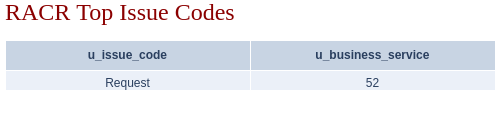

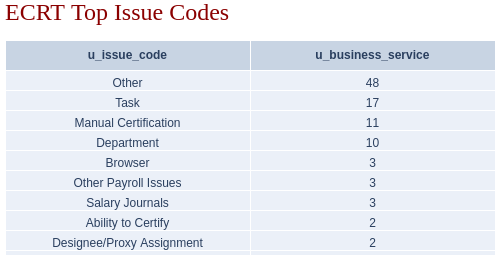

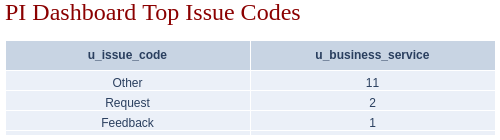

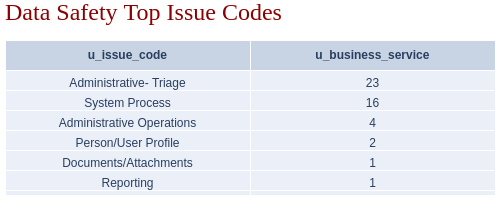

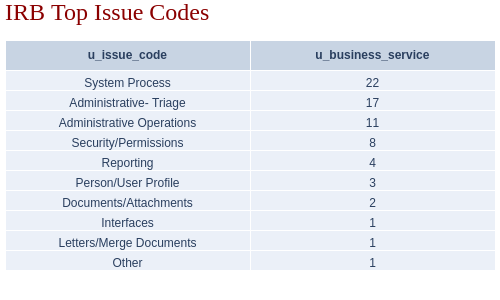

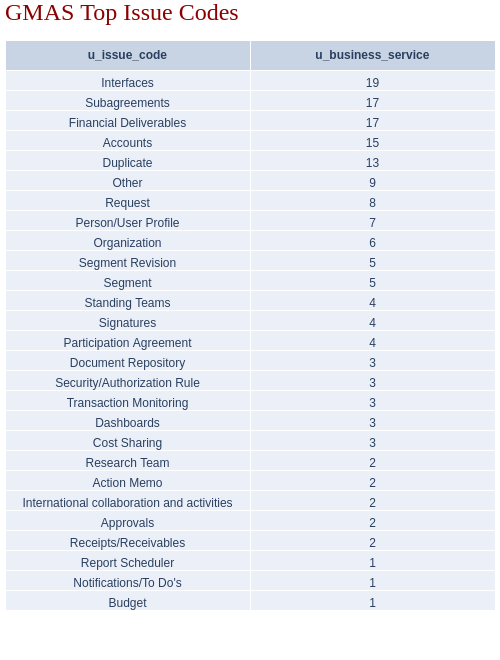

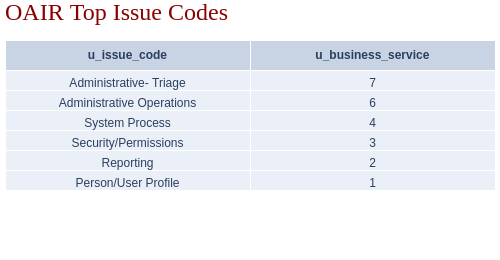

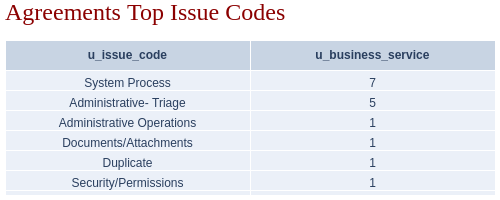

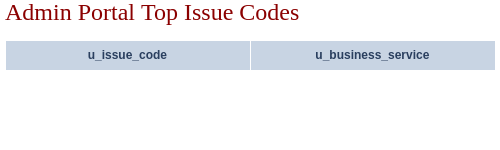

In [22]:
top_issue_codes("RACR Top Issue Codes",RACR_df, "u_business_service", "u_issue_code", 500, 140)
top_issue_codes("ECRT Top Issue Codes",ECRT_df, "u_business_service", "u_issue_code", 500, 260)
top_issue_codes("PI Dashboard Top Issue Codes",PI_Dashboard_df, "u_business_service", "u_issue_code", 500, 140)
top_issue_codes("Data Safety Top Issue Codes",Data_Safety_df, "u_business_service", "u_issue_code", 500, 200)
top_issue_codes("IRB Top Issue Codes",IRB_df, "u_business_service", "u_issue_code", 500, 300)
top_issue_codes("GMAS Top Issue Codes",GMAS_df, "u_business_service", "u_issue_code", 500, 660)
top_issue_codes("OAIR Top Issue Codes",OAIR_df, "u_business_service", "u_issue_code", 500, 260)
top_issue_codes("Agreements Top Issue Codes",Agreements_df, "u_business_service", "u_issue_code", 500, 200)
top_issue_codes("Admin Portal Top Issue Codes",Admin_Portal_df, "u_business_service", "u_issue_code", 500, 150)

In [23]:
## Parameters - title, dataframe, column name that you want a count of, categories/hue, x_scale, top_x:
def plot_df(title, dataframe,count_col,categories, xscale, top_x ):
  """
  Enter the dataframe you want to plot as the first argument.
  Enter the name of the column in quotes for the second argument.
  The third argument determines the hue; pick a column that you want
  to represent with different colors. Xscale number adjusts the tick marks.
  Top_x is to select the top x items to display
  """
  sns.set_theme(style="darkgrid", rc={'figure.figsize':(12,8)})
  g = sns.countplot(data=dataframe, y=count_col, hue=categories, palette="husl", order=dataframe[count_col].value_counts().iloc[:top_x].index)
  g.set_title(title, fontsize=15)
  # g.set_xticks(range(dataframe["month"].value_counts().max()))
  g.set_xticks(range(0,dataframe.groupby([count_col], sort=True)['month'].value_counts().max()+8,xscale))

  g.set_xlabel("\n Count of Tickets")
  g.set_ylabel(count_col)

  ax = g.axes
  for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width() + 2, p.get_y() + p.get_height() / 1.8), ha='center')
  plt.tight_layout()

  plt.savefig("/content/drive/MyDrive/Report images/"+title+".png")


def plot_df_issuecodes(title, dataframe,count_col,categories, xscale, top_x ):
  """
  Enter the dataframe you want to plot as the first argument.
  Enter the name of the column in quotes for the second argument.
  The third argument determines the hue; pick a column that you want
  to represent with different colors. Xscale number adjusts the tick marks.
  Top_x is to select the top x items to display
  """
  sns.set_theme(style="darkgrid", rc={'figure.figsize':(12,8)})
  g = sns.countplot(data=dataframe, y=count_col, hue=categories, palette="husl", order=dataframe[count_col].value_counts().iloc[:top_x].index)
  g.set_title(title, fontsize=15)

  g.set_xlabel("\n Count of Tickets")
  g.set_ylabel(count_col)
  plt.tight_layout()

  ax = g.axes
  for p in ax.patches:
    ax.annotate(str(int(p.get_width())), (p.get_x() + p.get_width() + 1.3, p.get_y() + p.get_height() / 1.3), ha='center')
    plt.tight_layout()

  plt.savefig("/content/drive/MyDrive/Report images/"+title+".png")

In [24]:
# try:
#   cancelled_tickets_df['u_business_service'].mask(cancelled_tickets_df['u_business_service'] == "Research Administration & Compliance Systems > Research Administration and Management > Research Administration & Compliance Reporting", "RACR", inplace=True)
# except Exception as NameError:
#   pass

# try:
#   cancelled_tickets_df['u_business_service'].mask(cancelled_tickets_df['u_business_service'] == "Research Administration & Compliance Systems > Research Administration and Management > Effort Reporting (ECRT)", "ECRT", inplace=True)
# except Exception as NameError:
#   pass

# try:
#   cancelled_tickets_df['u_business_service'].mask(cancelled_tickets_df['u_business_service'] == "Research Administration & Compliance Systems > Research Administration and Management > PI Dashboard", "PI_Dashboard", inplace=True)
# except Exception as NameError:
#   pass

# try:
#   cancelled_tickets_df['u_business_service'].mask(cancelled_tickets_df['u_business_service'] == "Research Administration & Compliance Systems > Research Compliance > Data Safety", "Data_Safety", inplace=True)
# except Exception as NameError:
#   pass

# try:
#   cancelled_tickets_df['u_business_service'].mask(cancelled_tickets_df['u_business_service'] == "Research Administration & Compliance Systems > Research Compliance > IRB (ESTR)", "IRB", inplace=True)
# except Exception as NameError:
#   pass

# try:
#   cancelled_tickets_df['u_business_service'].mask(cancelled_tickets_df['u_business_service'] == "Research Administration & Compliance Systems > Research Administration and Management > Grants Management (GMAS)", "GMAS", inplace=True)
# except Exception as NameError:
#   pass

# try:
#   cancelled_tickets_df['u_business_service'].mask(cancelled_tickets_df['u_business_service'] == "Research Administration & Compliance Systems > Research Compliance > Outside Activity and Interest Reporting (OAIR)", "OAIR", inplace=True)
# except Exception as NameError:
#   pass

# try:
#   cancelled_tickets_df['u_business_service'].mask(cancelled_tickets_df['u_business_service'] == "Research Administration & Compliance Systems > Research Compliance > Agreements", "Agreements", inplace=True)
# except Exception as NameError:
#   pass

# try:
#   cancelled_tickets_df['u_business_service'].mask(cancelled_tickets_df['u_business_service'] == "Research Administration & Compliance Systems > Research Administration and Management > Research Administration Portal", "Research Admin Portal", inplace=True)
# except Exception as NameError:
#   pass


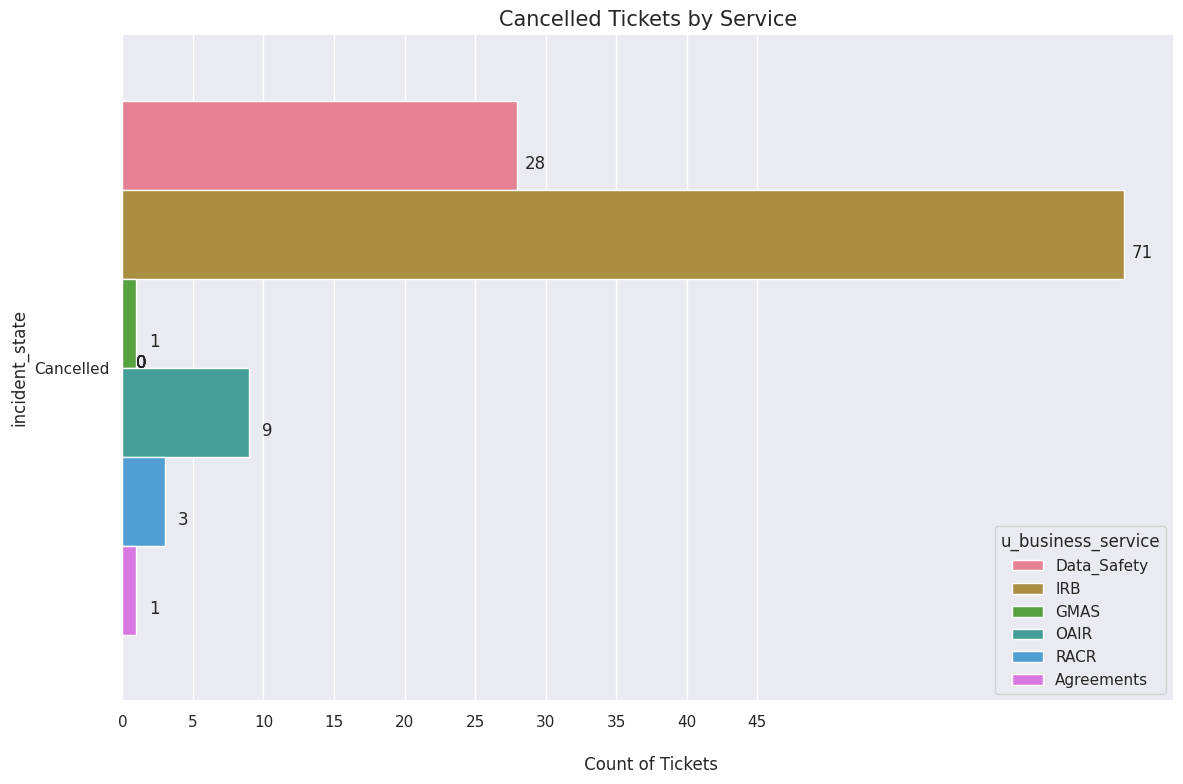

In [25]:
def plot_df(title, dataframe,count_col,categories, xscale, top_x ):
  """
  Enter the dataframe you want to plot as the first argument.
  Enter the name of the column in quotes for the second argument.
  The third argument determines the hue; pick a column that you want
  to represent with different colors. Xscale number adjusts the tick marks.
  Top_x is to select the top x items to display
  """
  sns.set_theme(style="darkgrid", rc={'figure.figsize':(12,8)})
  g = sns.countplot(data=dataframe, y=count_col, hue=categories, palette="husl", order=dataframe[count_col].value_counts().iloc[:top_x].index)
  g.set_title(title, fontsize=15)
  # g.set_xticks(range(dataframe["month"].value_counts().max()))
  g.set_xticks(range(0,dataframe.groupby([count_col], sort=True)['month'].value_counts().max()+8,xscale))

  g.set_xlabel("\n Count of Tickets")
  g.set_ylabel(count_col)

  ax = g.axes
  for p in ax.patches:
    ax.annotate(str(int(p.get_width())), (p.get_x() + p.get_width() + 1.3, p.get_y() + p.get_height() / 1.3), ha='center')
    plt.tight_layout()

plot_df("Cancelled Tickets by Service", cancelled_tickets_df, "incident_state", "u_business_service", 5, 8)

In [26]:
agg_df = df['Service_Group'].value_counts()
# agg_df

agg_df.head()

Service_Group
GMAS            161
H-Apps          158
ECRT            106
RACR             52
PI-Dashboard     15
Name: count, dtype: int64

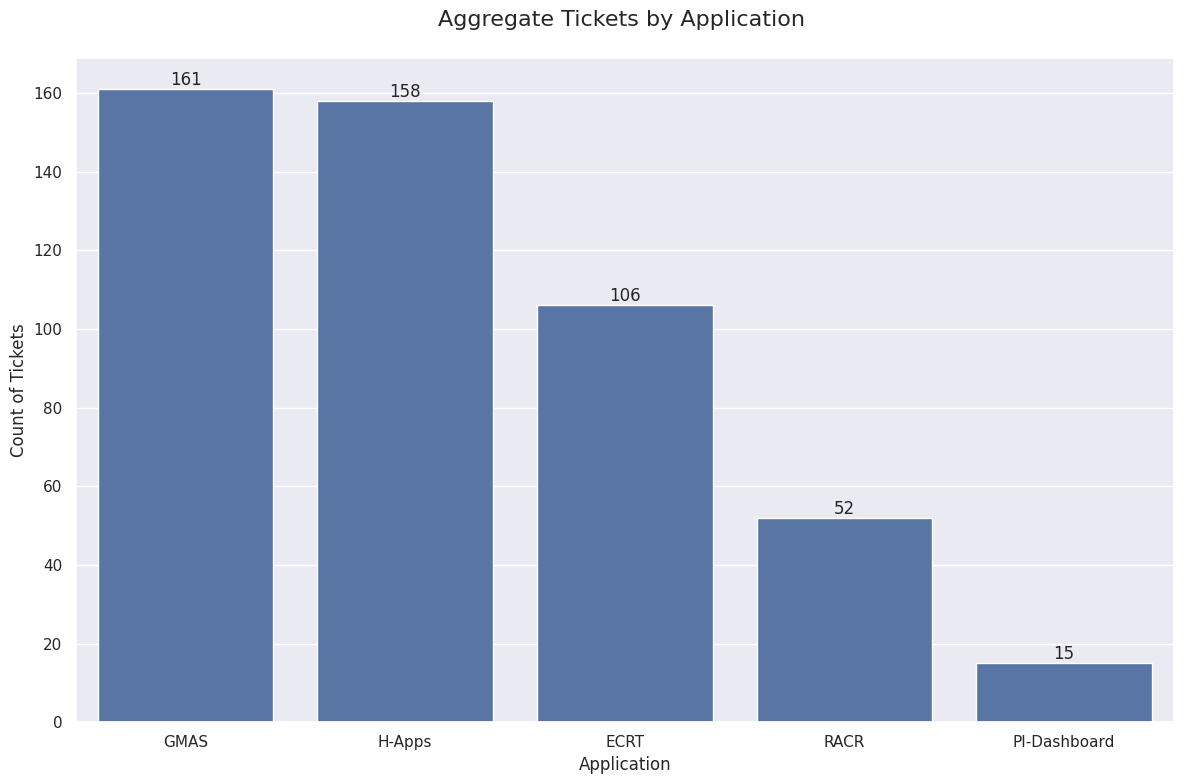

In [27]:
def aggregate(title,columns,df):
    aggdf = df[columns].value_counts()

    # create barplot using seaborn
    ax = sns.barplot(x=aggdf.index, y=aggdf.values)

    # add value labels on barplot
    for bars in ax.containers:
      ax.bar_label(bars)

    plt.title(title, fontsize=16)
    plt.xlabel("Application")
    plt.ylabel("Count of Tickets")

    plt.tight_layout()
    plt.savefig("/content/drive/MyDrive/Report images/Aggregate Tickets by Application")


# aggregate("Aggregate Tickets by Application \n",'Service_Group',df)
aggregate("Aggregate Tickets by Application \n",'Service_Group',df)

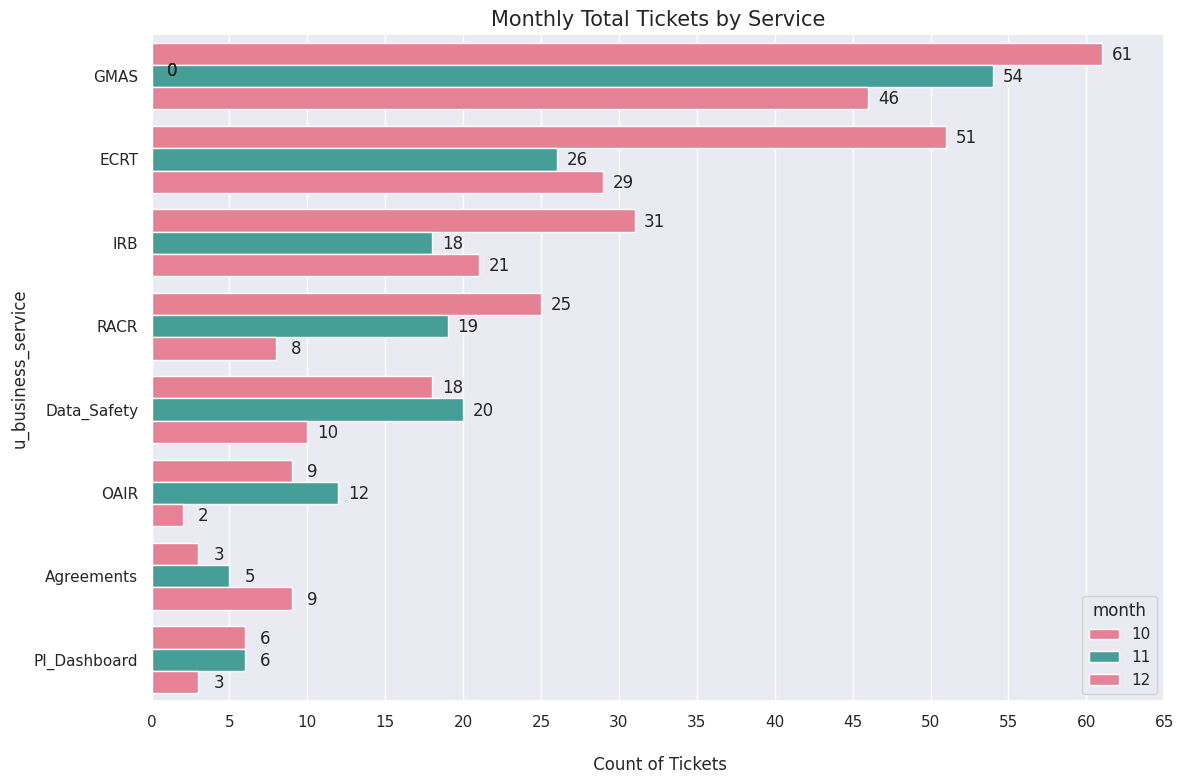

In [28]:
def plot_df(title, dataframe,count_col,categories, xscale, top_x ):
  """
  Enter the dataframe you want to plot as the first argument.
  Enter the name of the column in quotes for the second argument.
  The third argument determines the hue; pick a column that you want
  to represent with different colors. Xscale number adjusts the tick marks.
  Top_x is to select the top x items to display
  """
  sns.set_theme(style="darkgrid", rc={'figure.figsize':(12,8)})
  g = sns.countplot(data=dataframe, y=count_col, hue=categories, palette="husl", order=dataframe[count_col].value_counts().iloc[:top_x].index)
  g.set_title(title, fontsize=15)
  # g.set_xticks(range(dataframe["month"].value_counts().max()))
  g.set_xticks(range(0,dataframe.groupby([count_col], sort=True)['month'].value_counts().max()+8,xscale))

  g.set_xlabel("\n Count of Tickets")
  g.set_ylabel(count_col)

  ax = g.axes
  for p in ax.patches:
    ax.annotate(str(int(p.get_width())), (p.get_x() + p.get_width() + 1.3, p.get_y() + p.get_height() / 1.3), ha='center')
    plt.tight_layout()

  plt.savefig("/content/drive/MyDrive/Report images/"+title+".png")

plot_df("Monthly Total Tickets by Service", df, "u_business_service", "month", 5, 8)

# add value labels on plot


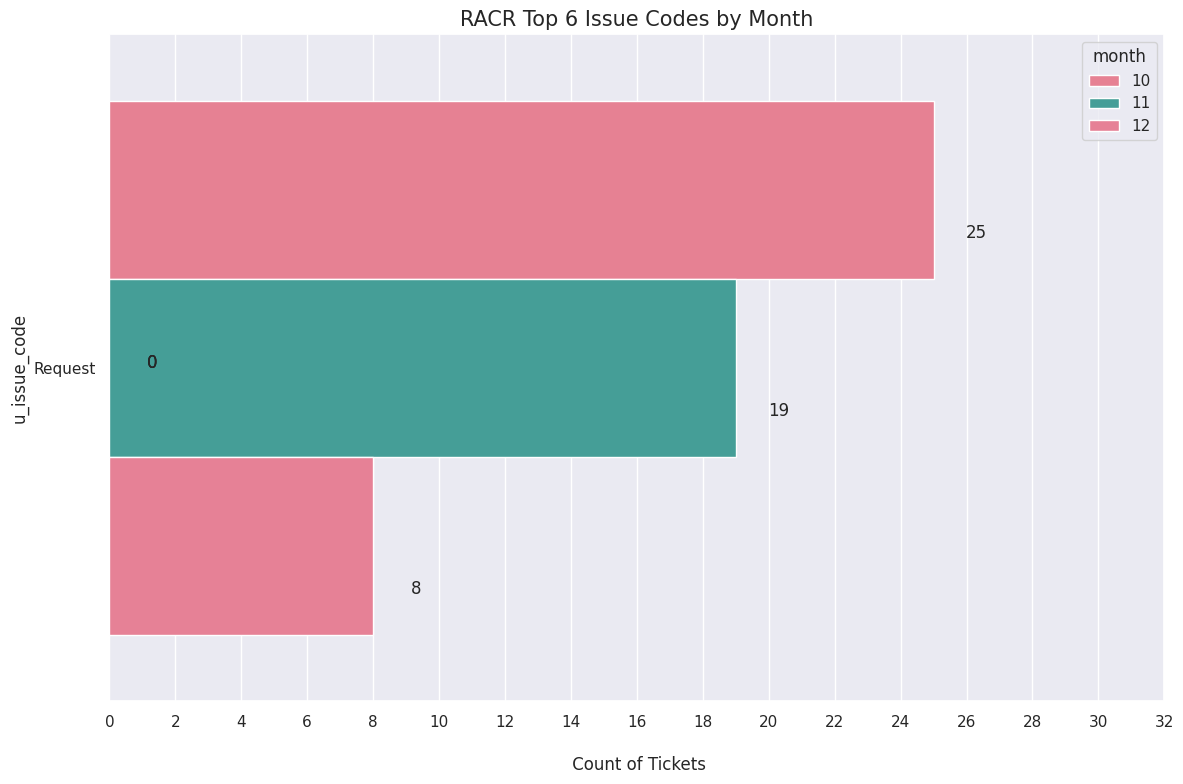

In [29]:
plot_df("RACR Top 6 Issue Codes by Month", RACR_df, "u_issue_code", "month",2, 5)

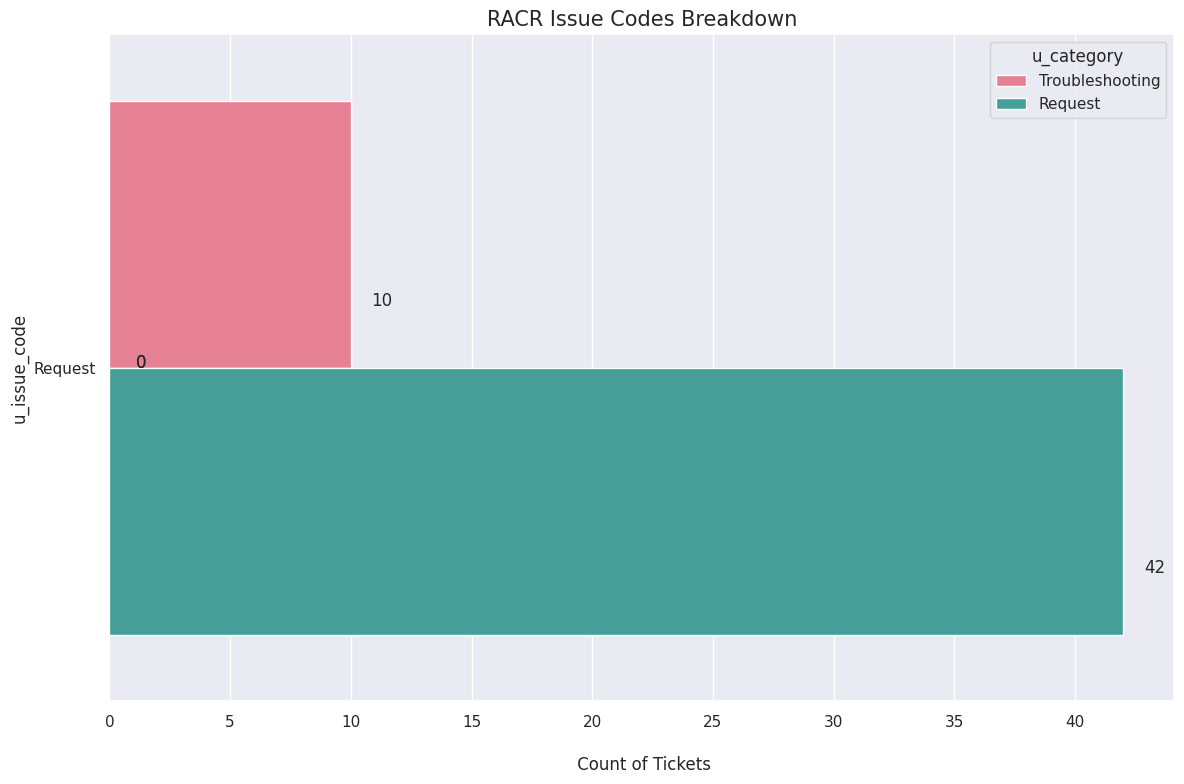

In [30]:
plot_df_issuecodes("RACR Issue Codes Breakdown", RACR_df, "u_issue_code", "u_category",5, 8)

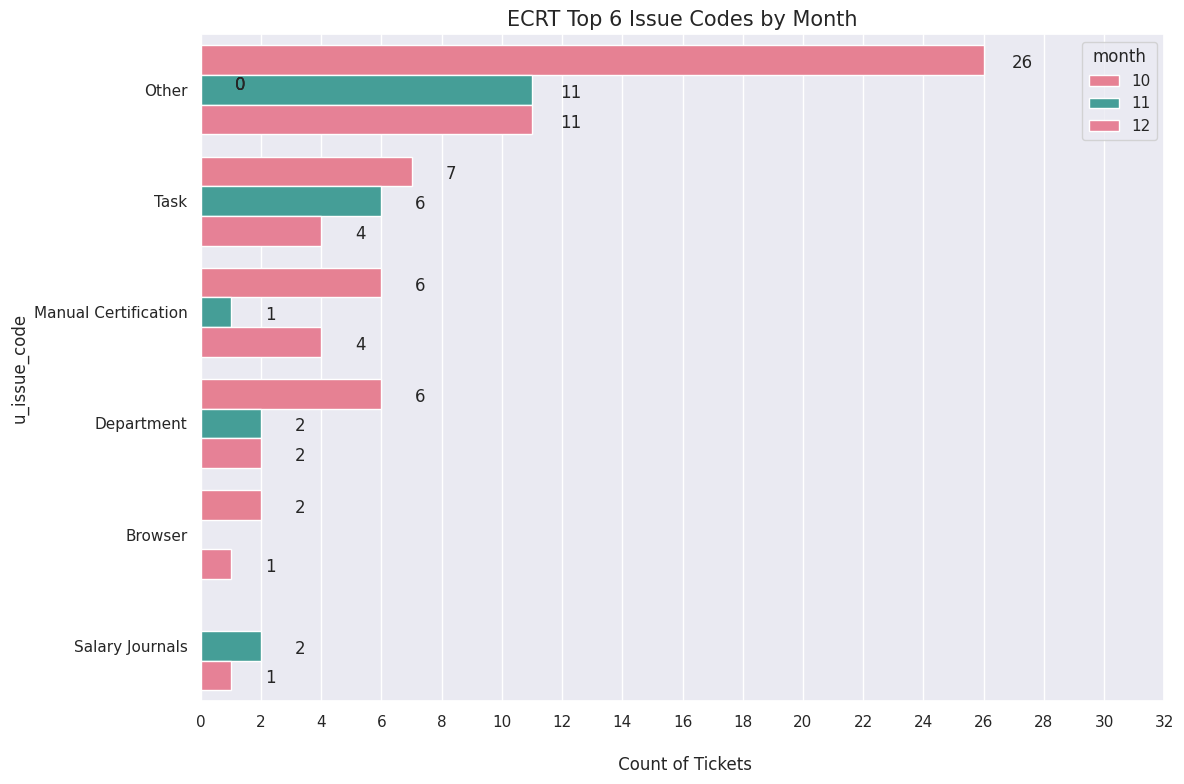

In [31]:
plot_df("ECRT Top 6 Issue Codes by Month", ECRT_df, "u_issue_code", "month", 2, 6)

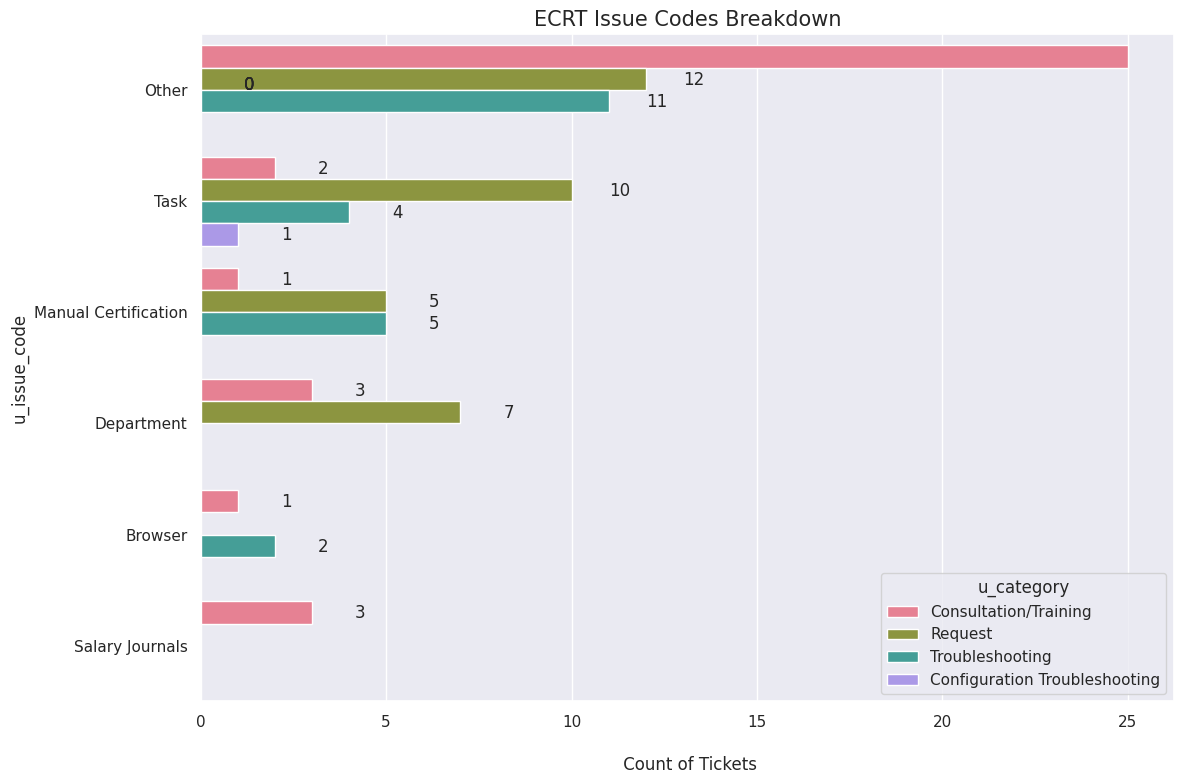

In [32]:
plot_df_issuecodes("ECRT Issue Codes Breakdown", ECRT_df, "u_issue_code", "u_category",6, 6)

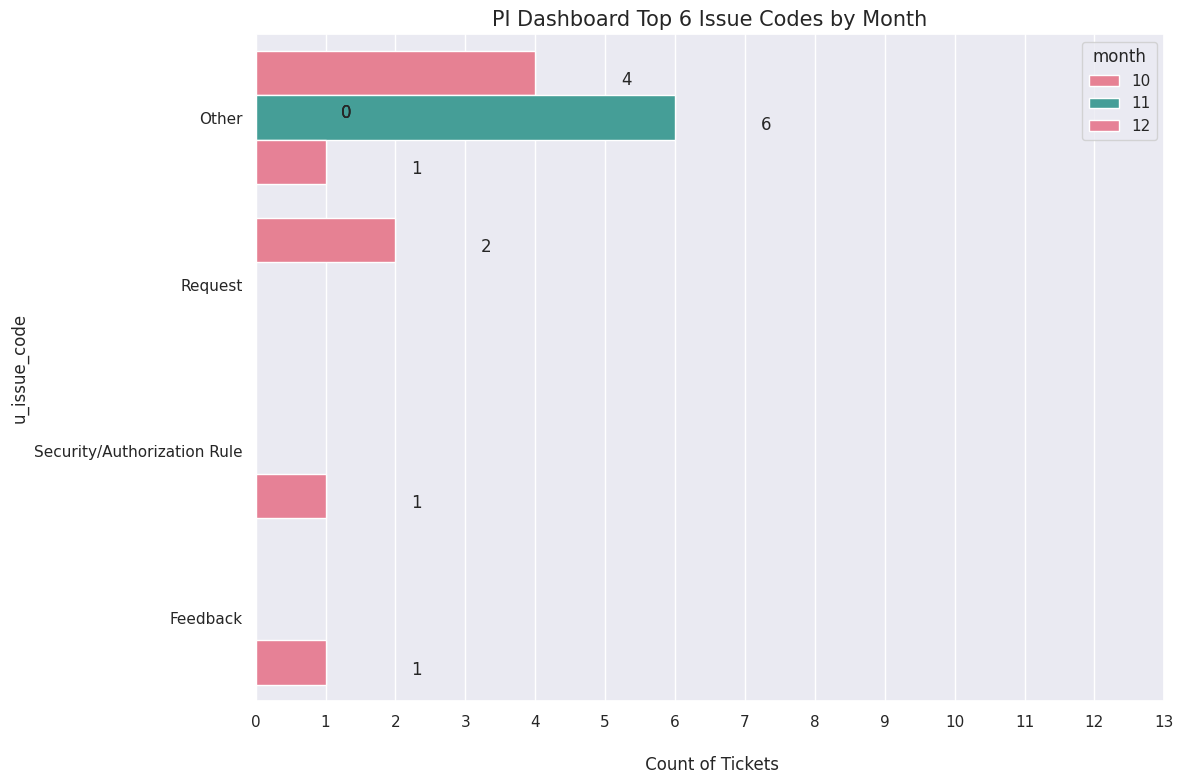

In [33]:
plot_df("PI Dashboard Top 6 Issue Codes by Month", PI_Dashboard_df, "u_issue_code", "month",1,6)

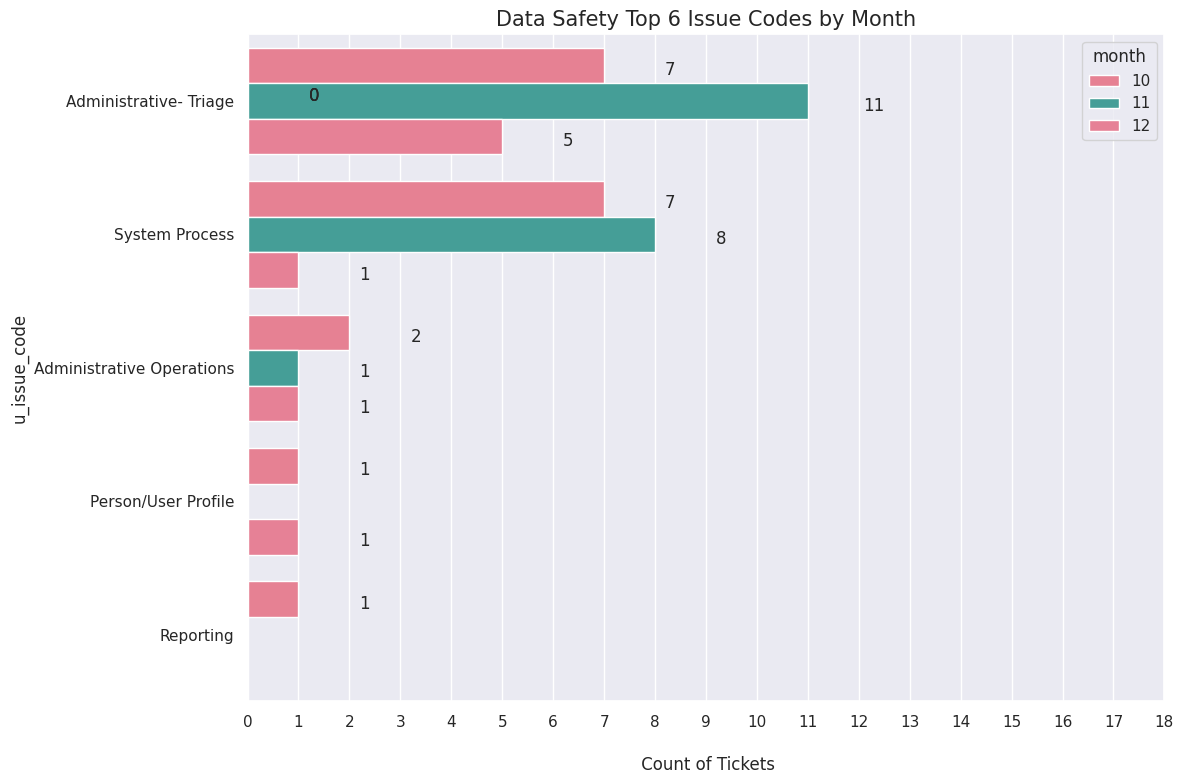

In [34]:
plot_df("Data Safety Top 6 Issue Codes by Month", Data_Safety_df, "u_issue_code", "month", 1, 5)

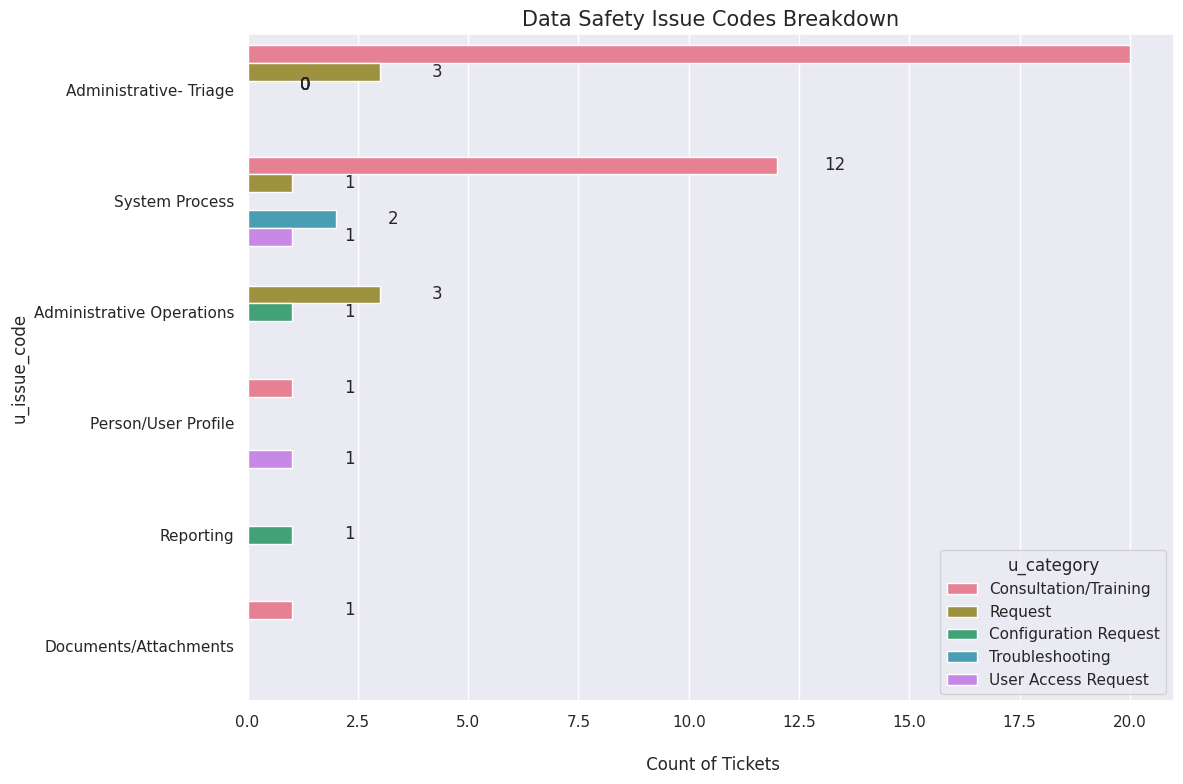

In [35]:
plot_df_issuecodes("Data Safety Issue Codes Breakdown", Data_Safety_df, "u_issue_code", "u_category",6, 6)

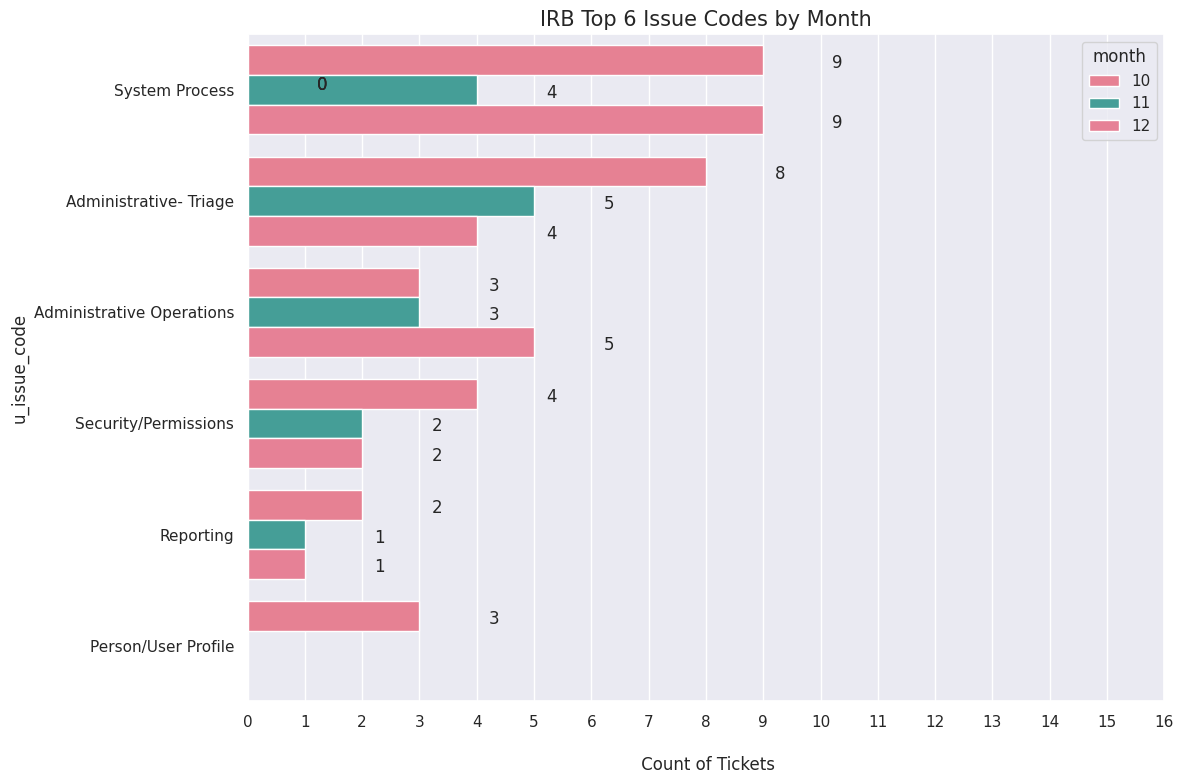

In [36]:
plot_df("IRB Top 6 Issue Codes by Month", IRB_df, "u_issue_code", "month",1,6)

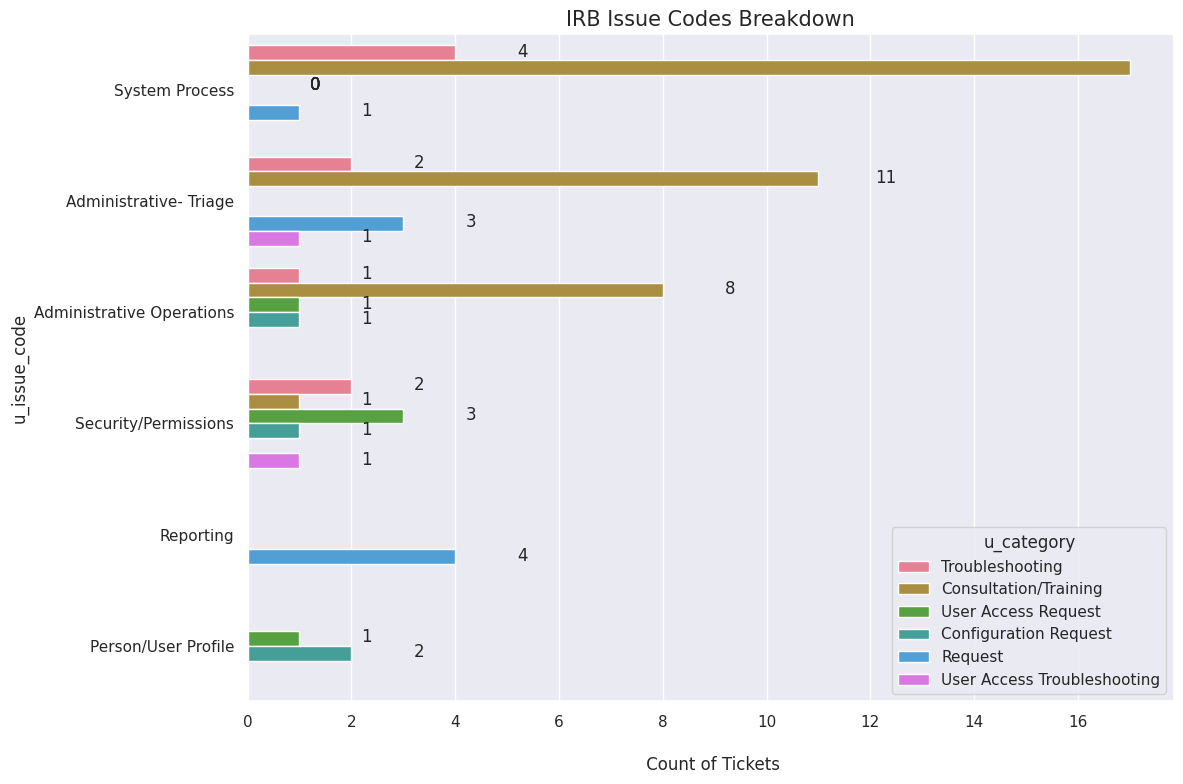

In [37]:
plot_df_issuecodes("IRB Issue Codes Breakdown", IRB_df, "u_issue_code", "u_category",6, 6)

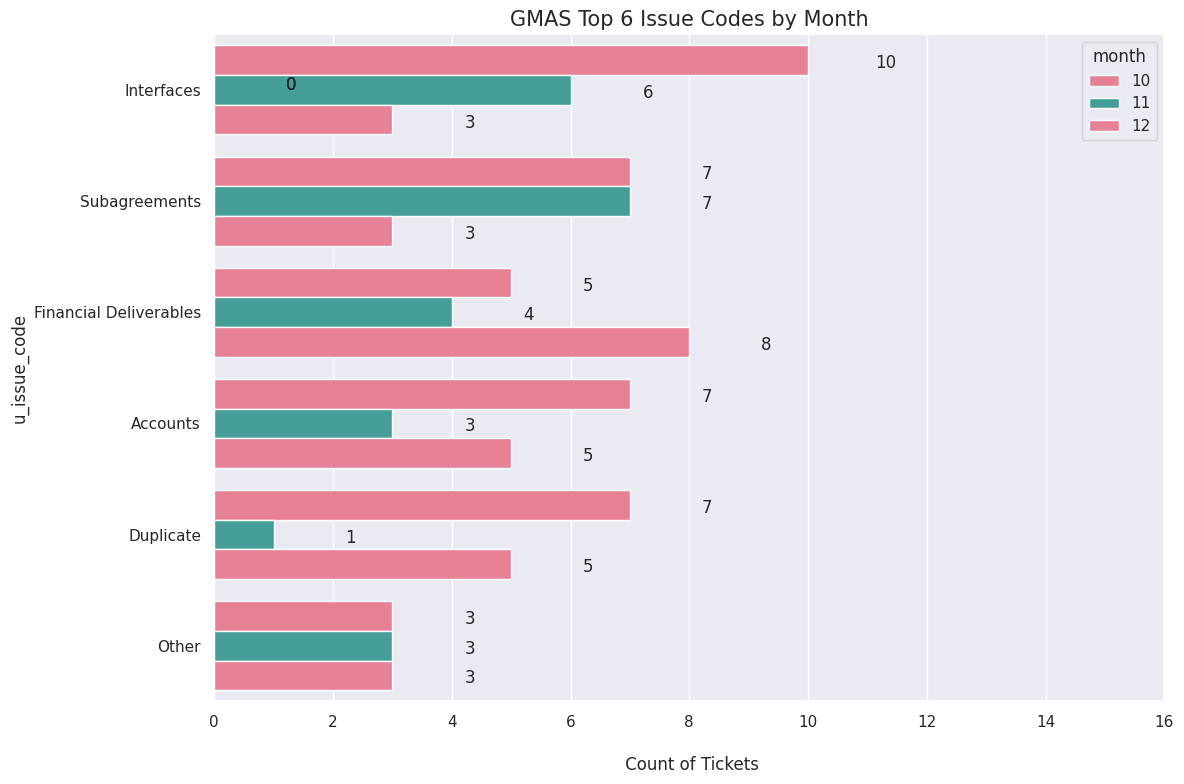

In [38]:
plot_df("GMAS Top 6 Issue Codes by Month", GMAS_df, "u_issue_code", "month", 2, 6)

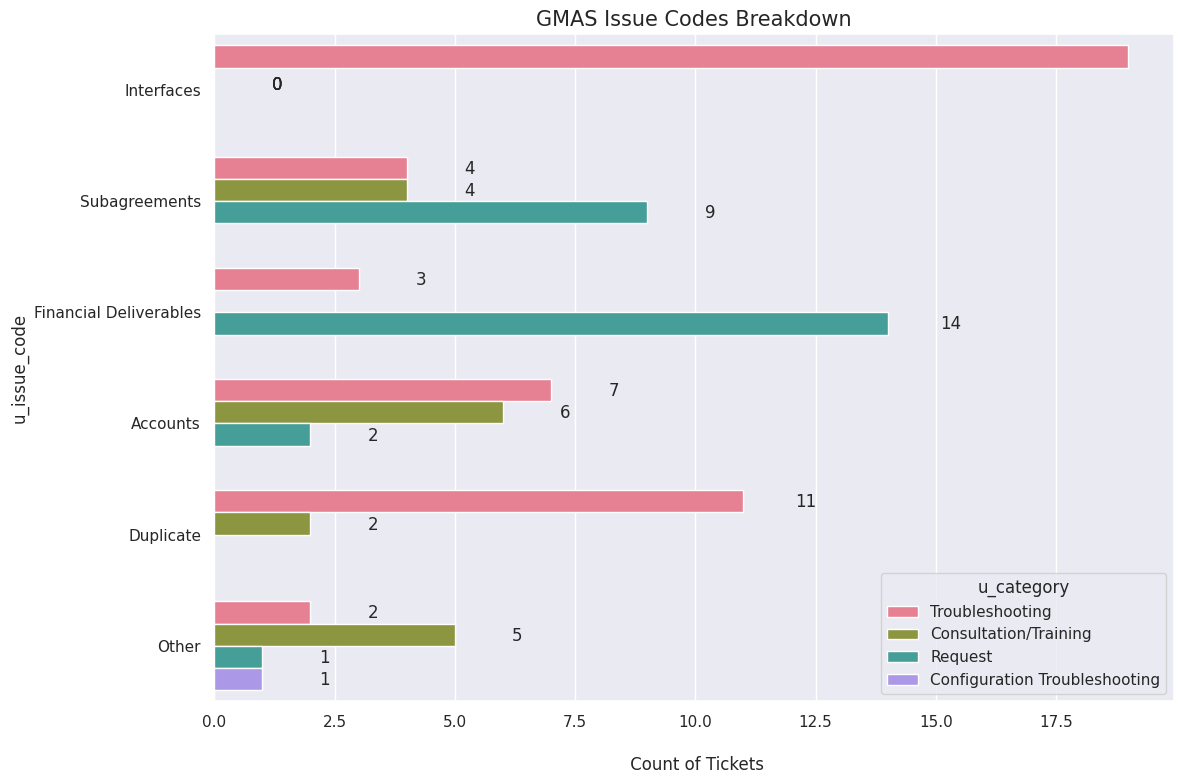

In [39]:
plot_df_issuecodes("GMAS Issue Codes Breakdown", GMAS_df, "u_issue_code", "u_category",6, 6)

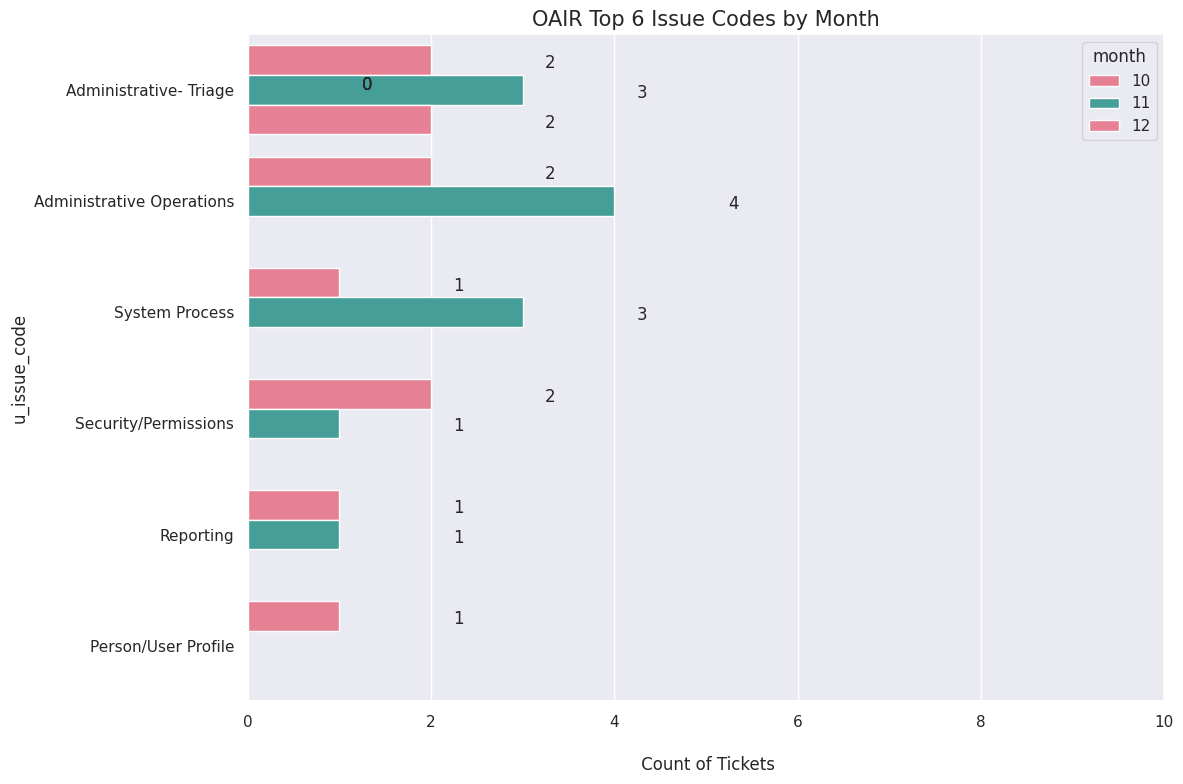

In [40]:
plot_df("OAIR Top 6 Issue Codes by Month", OAIR_df, "u_issue_code", "month", 2, 6)

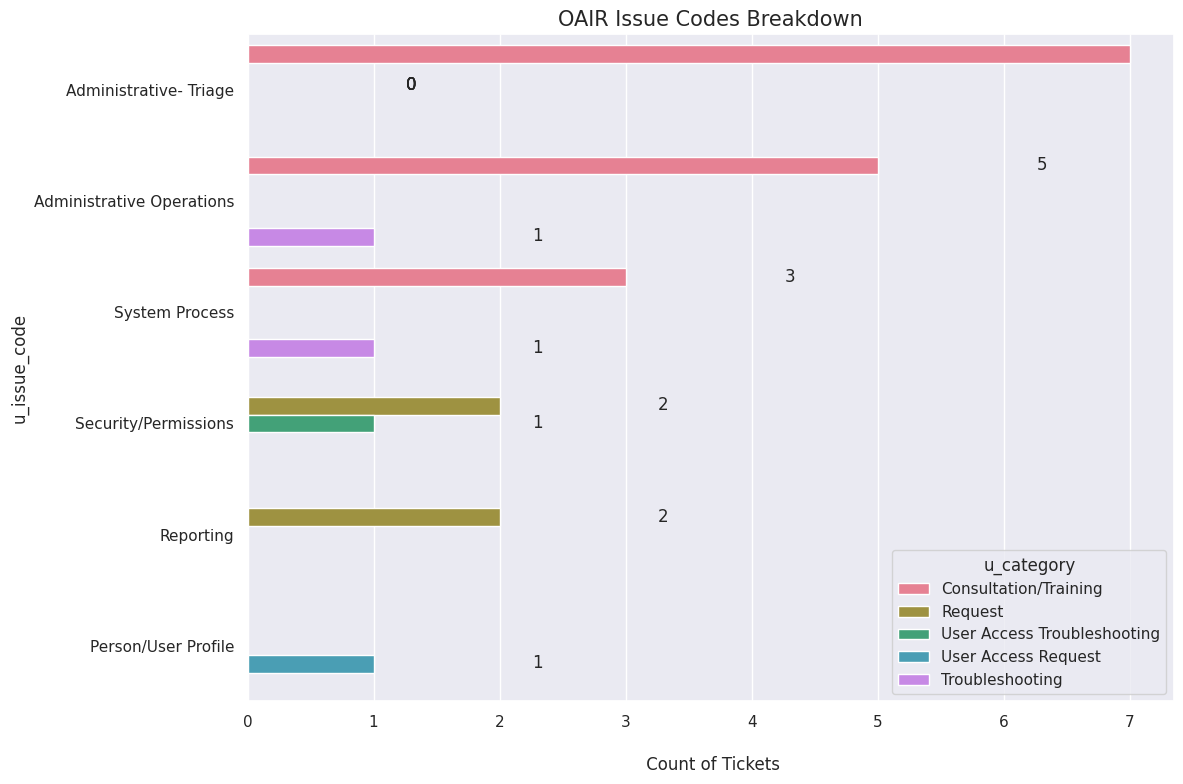

In [41]:
plot_df_issuecodes("OAIR Issue Codes Breakdown", OAIR_df, "u_issue_code", "u_category",6, 6)

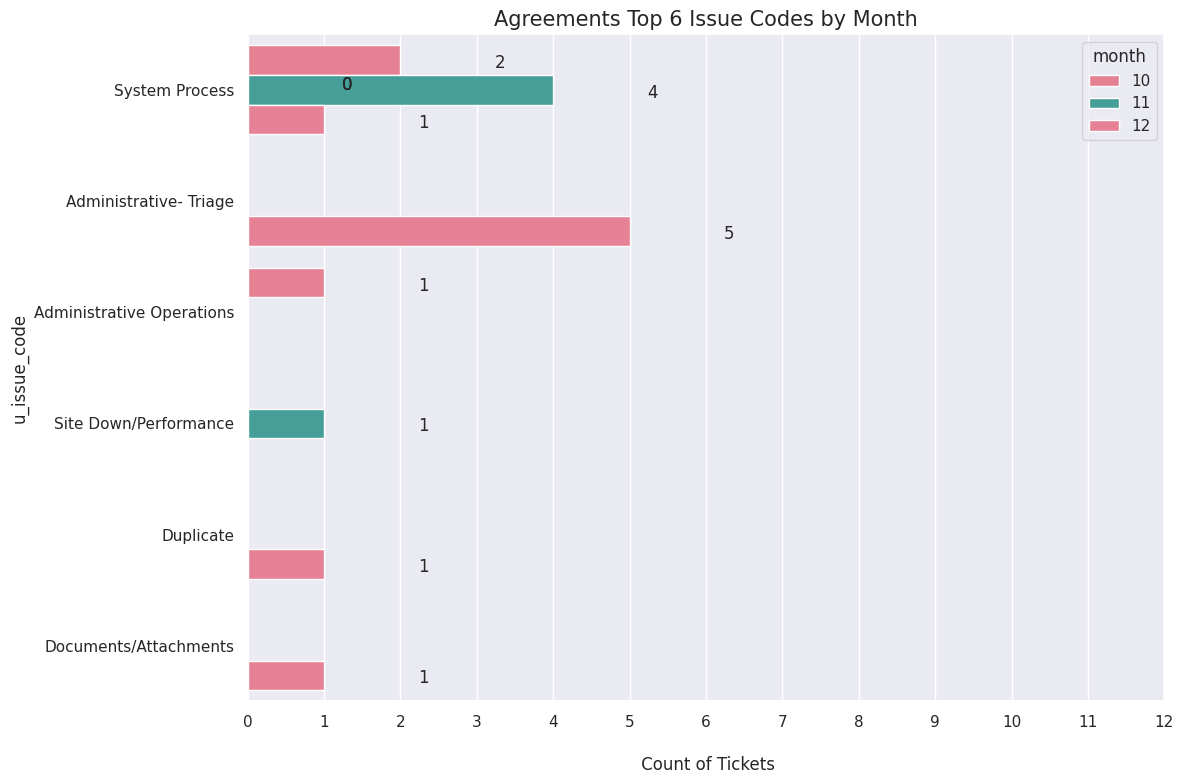

In [42]:
plot_df("Agreements Top 6 Issue Codes by Month", Agreements_df, "u_issue_code", "month", 1, 6)

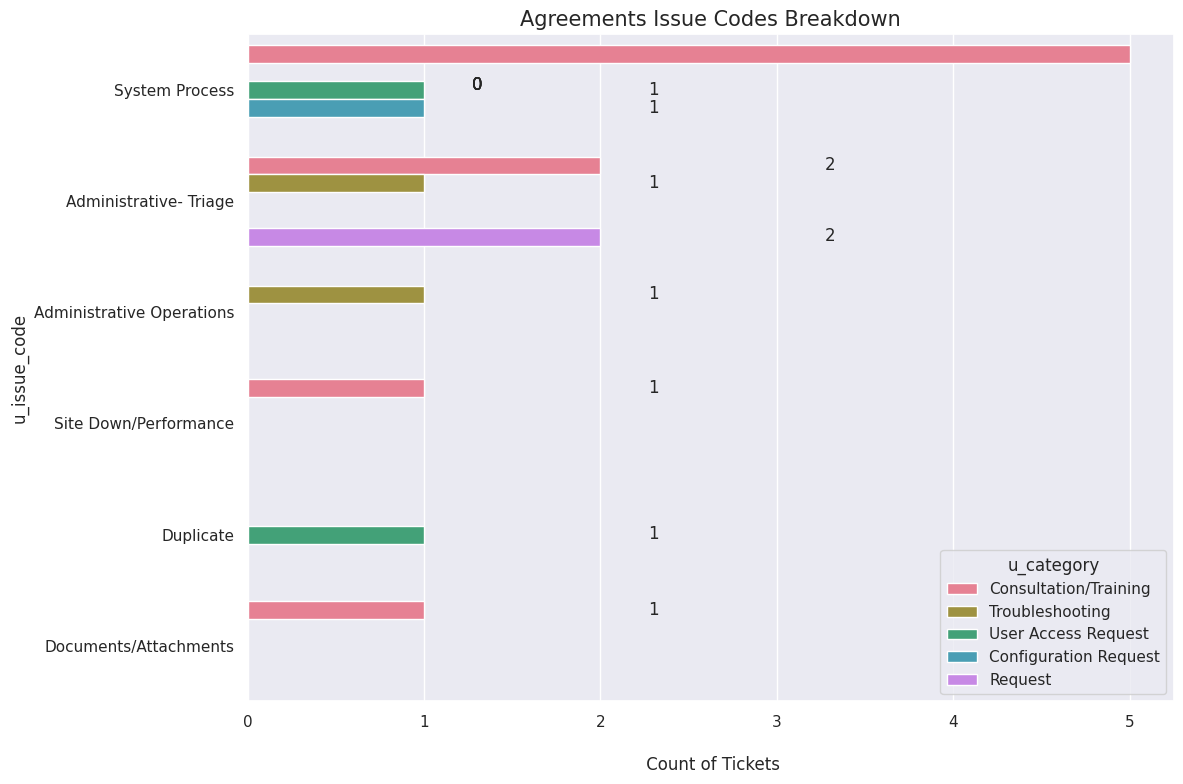

In [43]:
plot_df_issuecodes("Agreements Issue Codes Breakdown", Agreements_df, "u_issue_code", "u_category",6, 6)

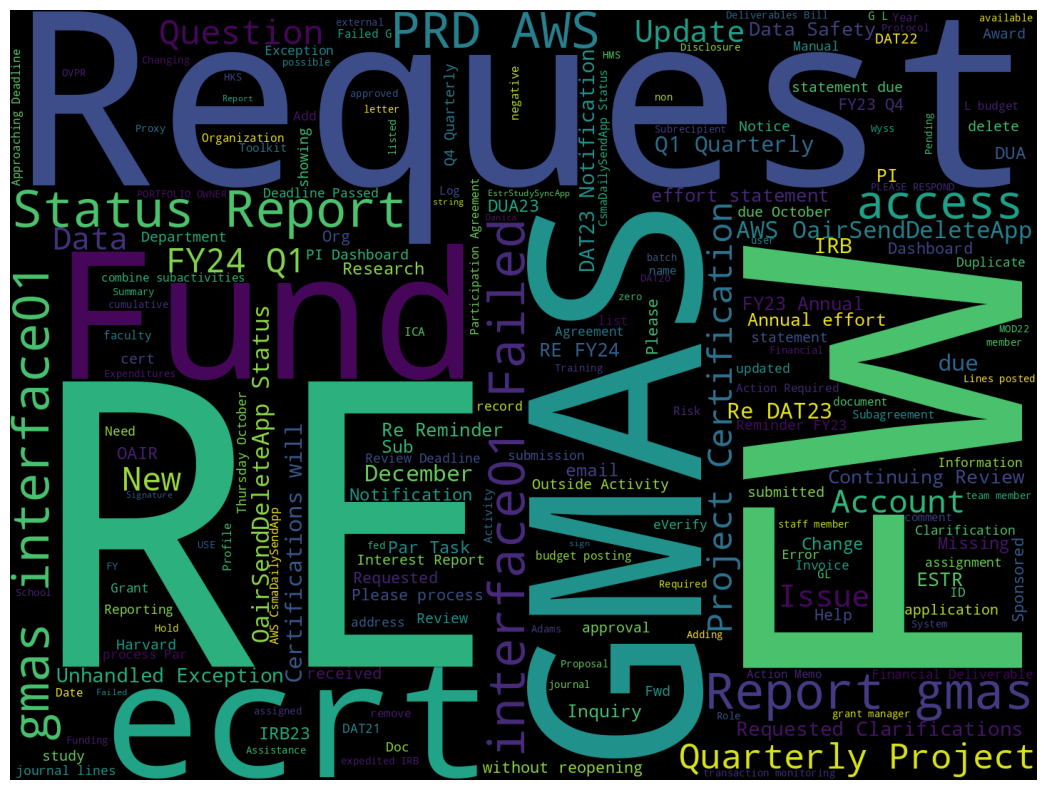

In [44]:
from wordcloud import WordCloud  #pip install wordcloud
from textblob import TextBlob  #Sentiment Analysis - pip install textblob
import matplotlib.pyplot as plt

train_qs = pd.Series(df['short_description'].tolist())
qs_text = " ".join(map(str, train_qs))

cloud = WordCloud(width=1440, height=1080).generate(qs_text)
plt.figure(figsize=(15, 10))
plt.imshow(cloud);
plt.axis('off');
plt.savefig("/content/drive/MyDrive/Report images/short_descriptions_wordcloud")

In [45]:
df['close_notes'] = df['close_notes'].fillna(" ")

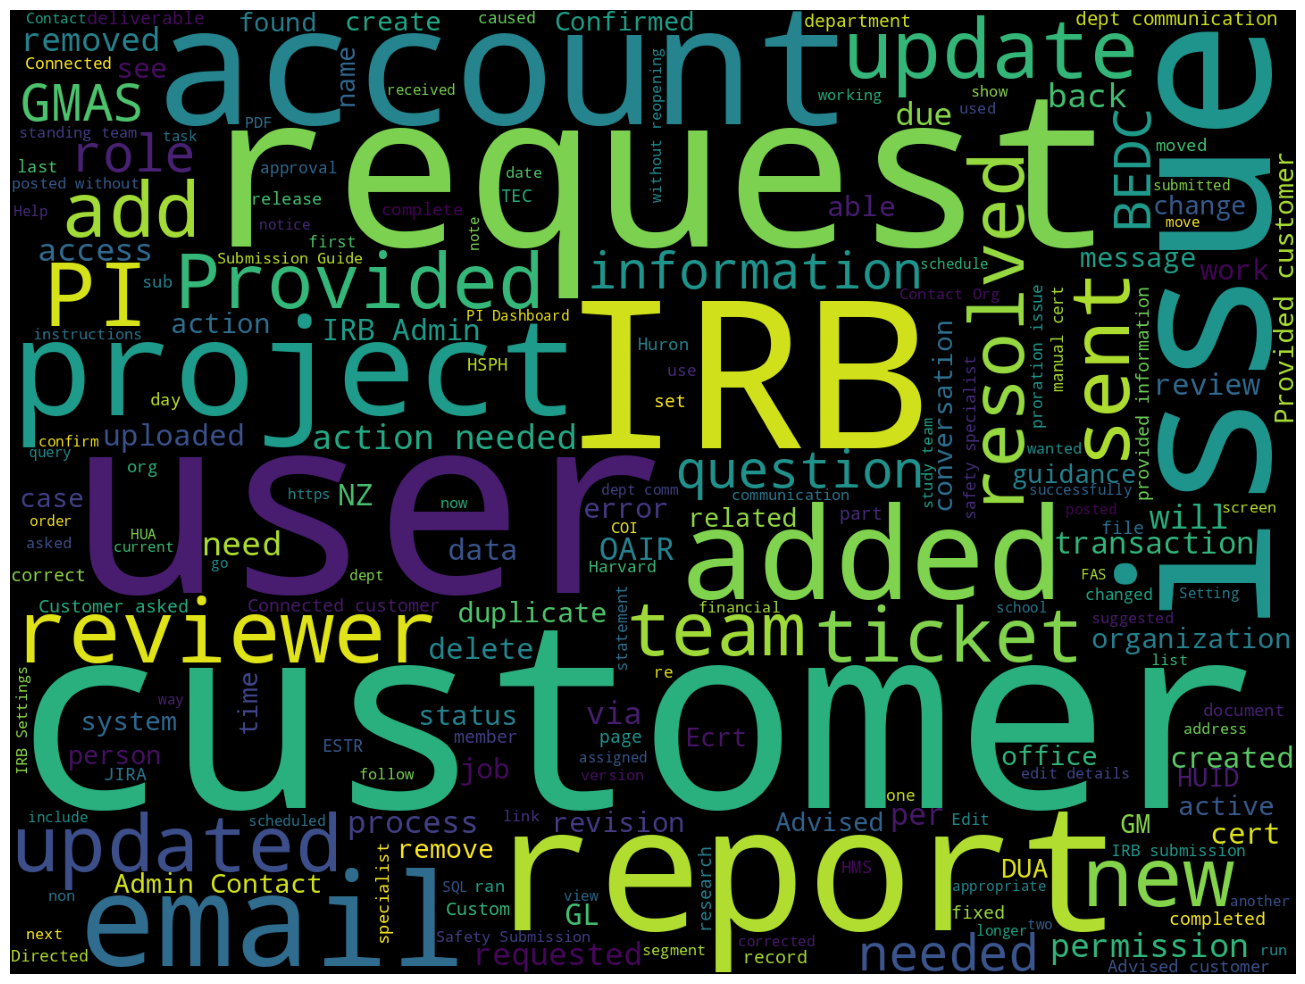

In [46]:
train_qs = pd.Series(df['close_notes'].tolist())
qs_text = " ".join(train_qs)

cloud = WordCloud(width=1440, height=1080).generate(qs_text)
plt.figure(figsize=(15, 10))
plt.imshow(cloud);
plt.axis('off');
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Report images/close_notes_wordcloud")

In [47]:
def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ len(df[(df[rows]==value) & (df[columns]==key)]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    # return aggdf
    aggdf.plot(kind='bar', stacked=True)
    plt.title("Aggregate Tickets by Application \n", fontsize=16)
    plt.yticks(np.arange(0, 200, step=10))
    plt.xlabel("Application")
    plt.ylabel("Count of Tickets")

    plt.tight_layout()

    plt.savefig("/content/drive/MyDrive/Report images/Aggregate Tickets by Application")

# aggregate('u_business_service','u_business_service',df).plot(kind='bar',stacked=True)
# aggregate('u_business_service','u_business_service',df)

In [48]:
# aggregate('Service_Group','Service_Group',df)

In [49]:
!pip install fpdf2
from fpdf import FPDF
import datetime
from datetime import datetime, timedelta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 3.5 MB/s eta 0:00:00


In [50]:
WIDTH = 210
HEIGHT = 297

In [51]:
import os
os.chdir("/content/drive/MyDrive/Report images")

images = os.listdir()

In [52]:
images_path = "/content/drive/MyDrive/Report images/"

images_path_list = []

for image in images:
  image_path = images_path+image
  images_path_list.append(image_path)

images_path_list

['/content/drive/MyDrive/Report images/Cancelled Tickets by Service.png',
 '/content/drive/MyDrive/Report images/Agreements Top Issue Codes.png',
 '/content/drive/MyDrive/Report images/Admin Portal Top Issue Codes.png',
 '/content/drive/MyDrive/Report images/Aggregate Tickets by Application.png',
 '/content/drive/MyDrive/Report images/RACR Issue Codes Breakdown.png',
 '/content/drive/MyDrive/Report images/RACR Top 6 Issue Codes by Month.png',
 '/content/drive/MyDrive/Report images/Monthly Total Tickets by Service.png',
 '/content/drive/MyDrive/Report images/ECRT Top 6 Issue Codes by Month.png',
 '/content/drive/MyDrive/Report images/ECRT Issue Codes Breakdown.png',
 '/content/drive/MyDrive/Report images/PI Dashboard Top 6 Issue Codes by Month.png',
 '/content/drive/MyDrive/Report images/Data Safety Top 6 Issue Codes by Month.png',
 '/content/drive/MyDrive/Report images/Data Safety Issue Codes Breakdown.png',
 '/content/drive/MyDrive/Report images/IRB Top 6 Issue Codes by Month.png',
 '

In [53]:
def create_title(pdf, day):
  pdf.set_font('Arial', '', 24)
  pdf.ln(60)
  pdf.write(5, f"ServiceNow Quarterly Report")
  pdf.set_font('Arial', '', 16)
  pdf.ln(10)
  pdf.write(5, f"FY24 Quarter III Ticket Review Meeting")
  pdf.ln(150)
  pdf.write(30, f"Report generated on {day}")

In [54]:
def create_report(day, filename="/content/drive/MyDrive/Service Now Report FY24_Q3.pdf"):
  pdf = FPDF()

  '''
  Title Page, Page 1
  '''

  pdf.add_page()
  pdf.image("/content/drive/MyDrive/harvard_letterhead.png", 0, 0, WIDTH)
  create_title(pdf, day)

  '''
  Page 2, Ticket Volume Overview Page
  '''

  pdf.add_page()
  pdf.set_font('Arial', 'B', 16)
  pdf.cell(40,15, 'Ticket Volume Overview')

  pdf.set_font('Arial','',12)
  pdf.set_xy(10,20)
  pdf.cell(10,15, 'The report was created only looking at tickets created in SNOW in the date range specified above.')
  pdf.set_xy(10,25)
  pdf.cell(10,15, 'Cancelled tickets are excluded from this assessment.  Visual of cancelled tickets is presented later.')

  pdf.image("/content/drive/MyDrive/Report images/Aggregate Tickets by Application.png", 10 , 35, WIDTH-20)
  pdf.image("/content/drive/MyDrive/Report images/Monthly Total Tickets by Service.png", 10 , HEIGHT/2 + 10, WIDTH*.95 - 10)

  '''
  Page 3 - Top Issue Codes for GMAS, table only
  '''

  pdf.add_page()
  pdf.set_font('Arial', 'B', 14)
  pdf.cell(40,10, 'Top Issue Codes for GMAS')
  pdf.image("/content/drive/MyDrive/Report images/GMAS Top Issue Codes.png", 10 , 20, WIDTH*.8-10)

  '''
  Page 4 - Top Issue Codes for GMAS, chart
  '''
  pdf.add_page()
  pdf.set_font('Arial', 'B', 14)
  pdf.cell(40,10, 'Top Issue Codes for GMAS')
  pdf.image("/content/drive/MyDrive/Report images/GMAS Top 6 Issue Codes by Month.png", 10 , 20, WIDTH*.9-10)

  pdf.set_xy(10,HEIGHT/2-10)
  pdf.cell(40,10, 'GMAS Issue Codes BreakDown')
  pdf.image("/content/drive/MyDrive/Report images/GMAS Issue Codes Breakdown.png", 10 , HEIGHT/2 + 10, WIDTH*.95 - 10)

  # pdf.image("/content/drive/MyDrive/Work/Report Images/RACR Top Issue Codes.png", 10 , HEIGHT/2, WIDTH*.65)
  # pdf.image("/content/drive/MyDrive/Work/Report Images/RACR Top 6 Issue Codes by Month.png", 10 , HEIGHT/2+30, WIDTH*.8)


  '''
  Page 5 - Top Issue Codes for ECRT, table + chart
  '''
  pdf.add_page()
  pdf.set_font('Arial', 'B', 14)
  pdf.cell(40,10, 'Top Issue Codes for ECRT')
  pdf.image("/content/drive/MyDrive/Report images/ECRT Top 6 Issue Codes by Month.png", 10 , 20, WIDTH*.9-10)

  pdf.set_xy(10,HEIGHT/2-10)
  pdf.cell(40,10, 'ECRT Issue Codes BreakDown')
  pdf.image("/content/drive/MyDrive/Report images/ECRT Issue Codes Breakdown.png", 10 , HEIGHT/2 + 10, WIDTH*.95 - 10)

  '''
  Page 6 - Top Issue Codes IRB
  '''
  pdf.add_page()
  pdf.set_font('Arial', 'B', 14)
  pdf.cell(40,10, 'Top Issue Codes for IRB')
  pdf.image("/content/drive/MyDrive/Report images/IRB Top 6 Issue Codes by Month.png", 10 , 20, WIDTH*.9-10)

  pdf.set_xy(10,HEIGHT/2-10)
  pdf.cell(40,10, 'IRB Issue Codes BreakDown')
  pdf.image("/content/drive/MyDrive/Report images/IRB Issue Codes Breakdown.png", 10 , HEIGHT/2 + 10, WIDTH*.95 - 10)

  '''
  Page 7, Top Issue Codes for RACR
  '''
  pdf.add_page()
  pdf.set_font('Arial', 'B', 14)
  pdf.cell(40,10, 'Top Issue Codes for RACR')
  pdf.image("/content/drive/MyDrive/Report images/RACR Top 6 Issue Codes by Month.png", 10 , 20, WIDTH*.9-10)

  pdf.set_xy(10,HEIGHT/2-10)
  pdf.cell(40,10, 'RACR Issue Codes BreakDown')
  pdf.image("/content/drive/MyDrive/Report images/RACR Issue Codes Breakdown.png", 10 , HEIGHT/2 + 10, WIDTH*.95 - 10)

  '''
  Page 8, Top Issue Codes for OAIR
  '''
  pdf.add_page()
  pdf.set_font('Arial', 'B', 14)
  pdf.cell(40,10, 'Top Issue Codes for OAIR')
  pdf.image("/content/drive/MyDrive/Report images/OAIR Top 6 Issue Codes by Month.png", 10 , 20, WIDTH*.9-10)

  pdf.set_xy(10,HEIGHT/2-10)
  pdf.cell(40,10, 'RACR Issue Codes BreakDown')
  pdf.image("/content/drive/MyDrive/Report images/OAIR Issue Codes Breakdown.png", 10 , HEIGHT/2 + 10, WIDTH*.95 - 10)

  '''
  Page 9, Top Issue Codes for Data Safety
  '''
  pdf.add_page()
  pdf.set_font('Arial', 'B', 14)
  pdf.cell(40,10, 'Top Issue Codes for Data Safety')
  pdf.image("/content/drive/MyDrive/Report images/Data Safety Top 6 Issue Codes by Month.png", 10 , 20, WIDTH*.9-10)

  pdf.set_xy(10,HEIGHT/2-10)
  pdf.cell(40,10, 'Data Safety Issue Codes BreakDown')
  pdf.image("/content/drive/MyDrive/Report images/Data Safety Issue Codes Breakdown.png", 10 , HEIGHT/2 + 10, WIDTH*.95 - 10)

  '''
  Page 10, Top Issue Codes for Agreements
  '''
  pdf.add_page()
  pdf.set_font('Arial', 'B', 14)
  pdf.cell(40,10, 'Top Issue Codes for Agreements')
  pdf.image("/content/drive/MyDrive/Report images/Agreements Top 6 Issue Codes by Month.png", 10 , 20, WIDTH*.9-10)

  pdf.set_xy(10,HEIGHT/2-10)
  pdf.cell(40,10, 'Agreements Issue Codes BreakDown')
  pdf.image("/content/drive/MyDrive/Report images/Agreements Issue Codes Breakdown.png", 10 , HEIGHT/2 + 10, WIDTH*.95 - 10)

  '''
  Page 11, Cancelled Tickets by Service and close notes word cloud
  '''
  pdf.add_page()
  pdf.set_font('Arial', 'B', 16)
  pdf.cell(40,15, 'Cancelled Tickets by Service')

  pdf.image("/content/drive/MyDrive/Report images/Cancelled Tickets by Service.png", 10 , 25, WIDTH*.9-10)

  pdf.set_xy(10,HEIGHT/2-10)
  pdf.cell(40,10, 'Close Notes Word Cloud')
  pdf.image("/content/drive/MyDrive/Report images/close_notes_wordcloud.png", 10 , HEIGHT/2, WIDTH*.9)


  '''
  Page 12, Incident Descriptions word cloud
  '''
  pdf.add_page()
  pdf.set_font('Arial', 'B', 16)
  pdf.cell(40,15, 'Incident Short Descriptions Word Cloud')

  pdf.image("/content/drive/MyDrive/Report images/short_descriptions_wordcloud.png",10 , 20, WIDTH*.9)
  # count = 1
  # for image in images_path_list:
  #   if count == 1:
  #     pdf.add_page()
  #     # pdf.image(image, w=pdf.w*.75, h=pdf.h/2)
  #     # pdf.image(image, 10, 20, HEIGHT/2, WIDTH*.6)
  #     pdf.image(image, 10, 20, WIDTH*.6)
  #     pdf.ln(10)
  #     count = count + 1
  #   else:
  #     # pdf.image(image, w=pdf.w*.75, h=pdf.h/2)
  #     pdf.image(image, 10, HEIGHT/2 + 20, WIDTH*.6)
  #     pdf.ln(10)
  #     count = 1

  pdf.output(filename, 'F')

if __name__ == '__main__':
  day = datetime.today().strftime("%m/%d/%y")
  create_report(day)

<ipython-input-53-8b7af9beb710>:2: DeprecationWarning:

Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed

<ipython-input-53-8b7af9beb710>:5: DeprecationWarning:

Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed

<ipython-input-54-9bdda0eae85c>:17: DeprecationWarning:

Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed

<ipython-input-54-9bdda0eae85c>:20: DeprecationWarning:

Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed

<ipython-input-54-9bdda0eae85c>:34: DeprecationWarning:

Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed

<ipython-input-54-9bdda0eae85c>:42: DeprecationWarning:

Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed

<ipython-inp